### PARTY AFFILIATION

In [377]:
import numpy as np
import csv

temp = [] 
with open("../../ECON_407/Primary Elections/R/cand_results_gop_2.csv", 'rU') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader: 
        temp.append(row)
temp = temp[1:]

from datetime import datetime
def convert_date(date): 
    date = date[:3] + " " + date[3:]
    return datetime.strptime(date, '%b %Y') #matplotlib.dates.date2num(

cand_results = []
for i in range(len(temp)): 
    if temp[i][3]!='NA':
        cand_results.append([temp[i][1].replace("\"",""), convert_date(temp[i][2].replace("\"","")), float(temp[i][3])])

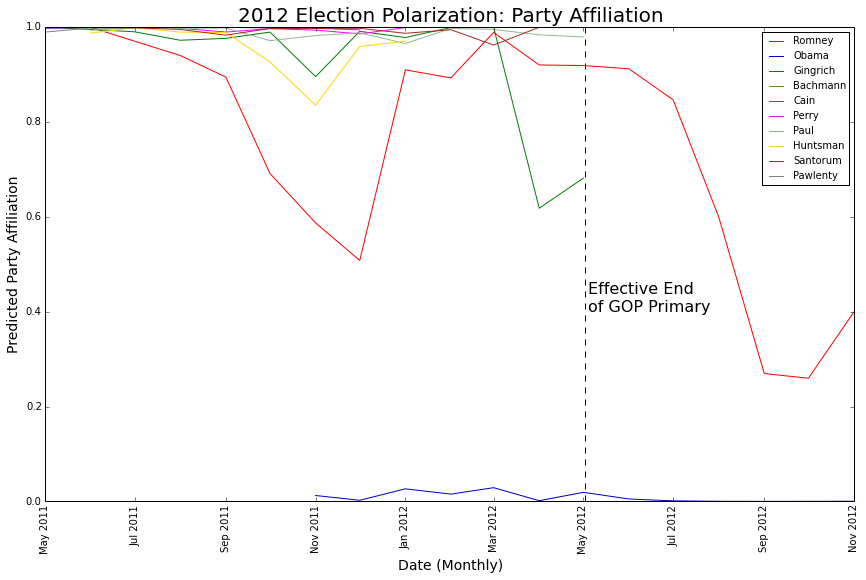

In [368]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib 
from matplotlib import colors
%matplotlib inline

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 8.5)

include_cands = ["Romney", "Obama", "Gingrich", "Bachmann", "Cain", "Perry", "Paul", "Huntsman", "Santorum", "Pawlenty"]
colors = ['red', 'mediumblue', 'green', 'olivedrab', 'darkorchid', 'magenta', 'darkseagreen', 'gold', 'brown', 'grey']
#include_cands = ["Romney", "Obama", "Bachmann", "Gingrich", "Santorum"]
i=0
for cand in include_cands: 
    ar = np.asarray(sorted([l for l in cand_results if l[0]==cand], key = lambda x: x[1]))
    if cand=="Romney":
        ar[-1][2]=.4
        ar[-4][2] = .6
    x = ar[:,1]
    y = ar[:,2]
    plt.plot(x, y, label=cand, color=colors[i])
    i+=1
plt.axvline(x=datetime(2012, 5, 2, 0, 0),color='k',ls='dashed')
plt.text(datetime(2012, 5, 4, 0, 0),.4,'Effective End \nof GOP Primary',rotation=0, fontsize=16)
plt.title("2012 Election Polarization: Party Affiliation", fontsize=20)
plt.xlabel("Date (Monthly)", fontsize=14)
plt.ylabel("Predicted Party Affiliation", fontsize=14)
plt.xticks(rotation='vertical')
plt.legend()
#plt.show()
plt.savefig('../../ECON_407/Primary Elections/MASTER/all_candidates_gop.eps', format='eps', dpi=1000)

### Average of all other candidates (!= Romney/Obama)

In [369]:
not_romney = [l for l in cand_results if l[0] not in ["Romney", "Obama", "Ryan", "Biden"]]
by_dates = {}
for res in not_romney: 
    if res[1] not in by_dates: 
        by_dates[res[1]] = {} 
        by_dates[res[1]]['scores']=[]
    by_dates[res[1]]['scores'].append(res[-1])

In [370]:
for date in by_dates: 
    by_dates[date]['mean'] = reduce(lambda x, y: x + y, by_dates[date]['scores'])/len(by_dates[date]['scores'])

In [371]:
cand_averages = [] 
for date in by_dates: 
    cand_averages.append([date, by_dates[date]['mean']])
cand_averages = np.asarray(sorted(cand_averages, key = lambda x: x[0]))

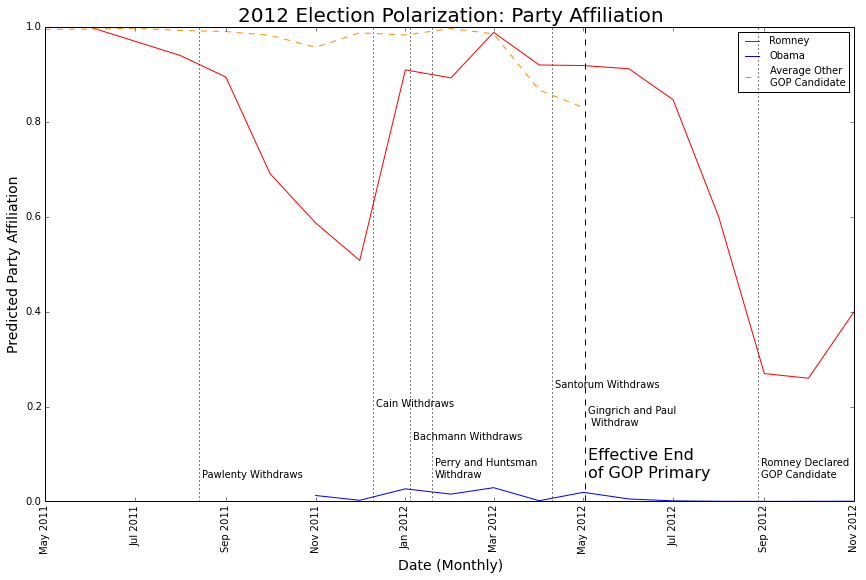

In [372]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 8.5)


mittens = np.asarray(sorted([l for l in cand_results if l[0]=="Romney"], key = lambda x: x[1]))
mittens[-1][2]=.4
mittens[-4][2] = .6
bama = np.asarray(sorted([l for l in cand_results if l[0]=="Obama"], key = lambda x: x[1]))
plt.plot(mittens[:,1], mittens[:,2], label="Romney", color="red")
plt.plot(bama[:,1], bama[:,2], label="Obama", color="blue")
plt.plot(cand_averages[:,0], cand_averages[:,1], label="Average Other \nGOP Candidate", color="darkorange", ls="dashed")
d = .3
plt.axvline(x=datetime(2012, 5, 2, 0, 0),color='k',ls='dashed')
plt.text(datetime(2012, 5, 4, 0, 0),.35-d,'Effective End \nof GOP Primary',rotation=0, fontsize=16)
plt.text(datetime(2012, 5, 4, 0, 0),.46-d,'Gingrich and Paul \n Withdraw',rotation=0)

plt.axvline(x=datetime(2012, 8, 28, 0, 0),color='k',ls='dotted')
plt.text(datetime(2012, 8, 30, 0, 0),.35-d,'Romney Declared \nGOP Candidate',rotation=0)

plt.axvline(x=datetime(2012, 4, 10, 0, 0),color='k',ls='dotted')
plt.text(datetime(2012, 4, 12, 0, 0),.54-d,'Santorum Withdraws',rotation=0)

plt.axvline(x=datetime(2012, 1, 19, 0, 0),color='k',ls='dotted')
plt.text(datetime(2012, 1, 21, 0, 0),.35-d,'Perry and Huntsman \nWithdraw',rotation=0)

plt.axvline(x=datetime(2012, 1, 4, 0, 0),color='k',ls='dotted')
plt.text(datetime(2012, 1, 6, 0, 0),.43-d,'Bachmann Withdraws',rotation=0)

plt.axvline(x=datetime(2011, 8, 14, 0, 0),color='k',ls='dotted')
plt.text(datetime(2011, 8, 16, 0, 0),.35-d,'Pawlenty Withdraws',rotation=0)

plt.axvline(x=datetime(2011, 12, 10, 0, 0),color='k',ls='dotted')
plt.text(datetime(2011, 12, 12, 0, 0),.5-d,'Cain Withdraws',rotation=0)

plt.title("2012 Election Polarization: Party Affiliation", fontsize=20)
plt.xlabel("Date (Monthly)", fontsize=14)
plt.ylabel("Predicted Party Affiliation", fontsize=14)
plt.xticks(rotation='vertical')
plt.legend()
#plt.show()
plt.savefig('../../ECON_407/Primary Elections/MASTER/avg_candidates_gop.eps', format='eps', dpi=1000)

## DWNOMINATE

In [388]:
import numpy as np
import csv

temp = [] 
with open("../../ECON_407/Primary Elections/R/cand_results_2.csv", 'rU') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader: 
        temp.append(row)
temp = temp[1:]

from datetime import datetime
def convert_date(date): 
    date = date[:3] + " " + date[3:]
    return datetime.strptime(date, '%b %Y') #matplotlib.dates.date2num(

cand_results = []
for i in range(len(temp)): 
    if temp[i][3]!='NA':
        cand_results.append([temp[i][1].replace("\"",""), convert_date(temp[i][2].replace("\"","")), float(temp[i][3])])

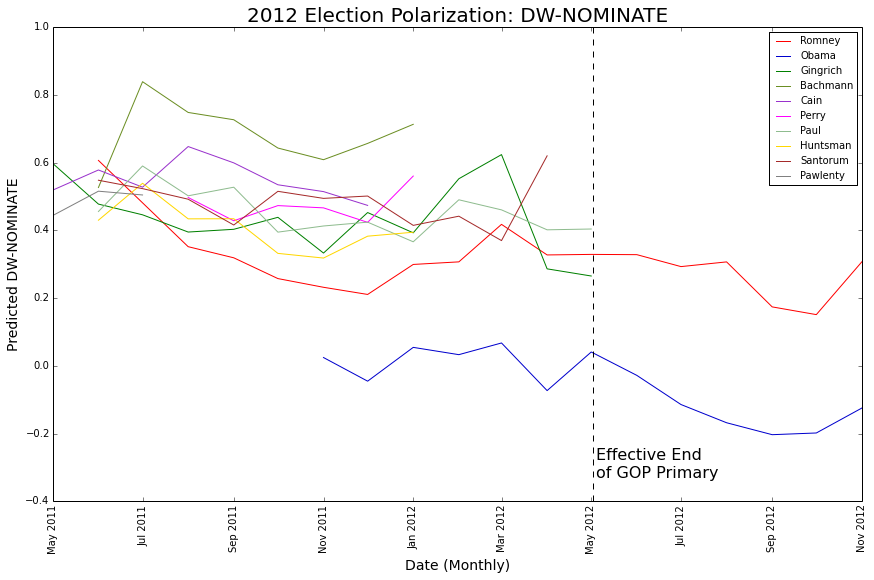

In [389]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib 
from matplotlib import colors
%matplotlib inline

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 8.5)

include_cands = ["Romney", "Obama", "Gingrich", "Bachmann", "Cain", "Perry", "Paul", "Huntsman", "Santorum", "Pawlenty"]
colors = ['red', 'mediumblue', 'green', 'olivedrab', 'darkorchid', 'magenta', 'darkseagreen', 'gold', 'brown', 'grey']
#include_cands = ["Romney", "Obama", "Bachmann", "Gingrich", "Santorum"]
i=0
for cand in include_cands: 
    ar = np.asarray(sorted([l for l in cand_results if l[0]==cand], key = lambda x: x[1]))
    x = ar[:,1]
    y = ar[:,2]
    plt.plot(x, y, label=cand, color=colors[i])
    i+=1
plt.axvline(x=datetime(2012, 5, 2, 0, 0),color='k',ls='dashed')
plt.text(datetime(2012, 5, 4, 0, 0),-.33,'Effective End \nof GOP Primary',rotation=0, fontsize=16)
plt.title("2012 Election Polarization: DW-NOMINATE", fontsize=20)
plt.xlabel("Date (Monthly)", fontsize=14)
plt.ylabel("Predicted DW-NOMINATE", fontsize=14)
plt.xticks(rotation='vertical')
plt.legend()
#plt.show()
plt.savefig('../../ECON_407/Primary Elections/MASTER/all_candidates_dwnom.eps', format='eps', dpi=1000)

In [391]:
not_romney = [l for l in cand_results if l[0] not in ["Romney", "Obama", "Ryan", "Biden"]]
by_dates = {}
for res in not_romney: 
    if res[1] not in by_dates: 
        by_dates[res[1]] = {} 
        by_dates[res[1]]['scores']=[]
    by_dates[res[1]]['scores'].append(res[-1])

for date in by_dates: 
    by_dates[date]['mean'] = reduce(lambda x, y: x + y, by_dates[date]['scores'])/len(by_dates[date]['scores'])

cand_averages = [] 
for date in by_dates: 
    cand_averages.append([date, by_dates[date]['mean']])
cand_averages = np.asarray(sorted(cand_averages, key = lambda x: x[0]))

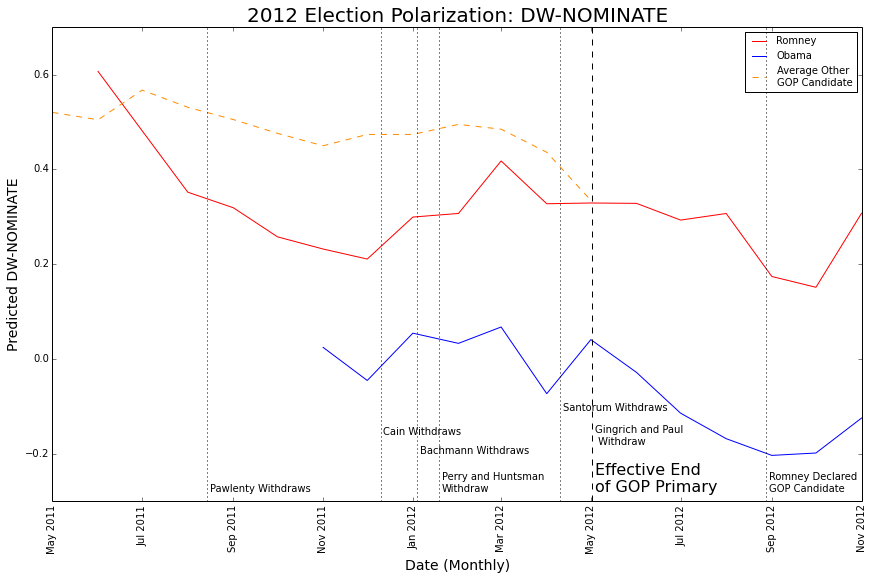

In [392]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 8.5)


mittens = np.asarray(sorted([l for l in cand_results if l[0]=="Romney"], key = lambda x: x[1]))
bama = np.asarray(sorted([l for l in cand_results if l[0]=="Obama"], key = lambda x: x[1]))
plt.plot(mittens[:,1], mittens[:,2], label="Romney", color="red")
plt.plot(bama[:,1], bama[:,2], label="Obama", color="blue")
plt.plot(cand_averages[:,0], cand_averages[:,1], label="Average Other \nGOP Candidate", color="darkorange", ls="dashed")
d = .63
plt.axvline(x=datetime(2012, 5, 2, 0, 0),color='k',ls='dashed')
plt.text(datetime(2012, 5, 4, 0, 0),.35-d,'Effective End \nof GOP Primary',rotation=0, fontsize=16)
plt.text(datetime(2012, 5, 4, 0, 0),.45-d,'Gingrich and Paul \n Withdraw',rotation=0)

plt.axvline(x=datetime(2012, 8, 28, 0, 0),color='k',ls='dotted')
plt.text(datetime(2012, 8, 30, 0, 0),.35-d,'Romney Declared \nGOP Candidate',rotation=0)

plt.axvline(x=datetime(2012, 4, 10, 0, 0),color='k',ls='dotted')
plt.text(datetime(2012, 4, 12, 0, 0),.52-d,'Santorum Withdraws',rotation=0)

plt.axvline(x=datetime(2012, 1, 19, 0, 0),color='k',ls='dotted')
plt.text(datetime(2012, 1, 21, 0, 0),.35-d,'Perry and Huntsman \nWithdraw',rotation=0)

plt.axvline(x=datetime(2012, 1, 4, 0, 0),color='k',ls='dotted')
plt.text(datetime(2012, 1, 6, 0, 0),.43-d,'Bachmann Withdraws',rotation=0)

plt.axvline(x=datetime(2011, 8, 14, 0, 0),color='k',ls='dotted')
plt.text(datetime(2011, 8, 16, 0, 0),.35-d,'Pawlenty Withdraws',rotation=0)

plt.axvline(x=datetime(2011, 12, 10, 0, 0),color='k',ls='dotted')
plt.text(datetime(2011, 12, 12, 0, 0),.47-d,'Cain Withdraws',rotation=0)


plt.title("2012 Election Polarization: DW-NOMINATE", fontsize=20)
plt.xlabel("Date (Monthly)", fontsize=14)
plt.ylabel("Predicted DW-NOMINATE", fontsize=14)
plt.xticks(rotation='vertical')
plt.legend()
#plt.show()
plt.savefig('../../ECON_407/Primary Elections/MASTER/avg_candidates_dwnom.eps', format='eps', dpi=1000)

In [393]:
print len([l for l in cand_results if l[-1]<=.9 and l[0]=='Romney'])
print len([l for l in cand_results if l[-1]>=.9 and l[0]=='Romney'])

17
0


## Controlling for Counts

In [473]:
import pickle
romney_counts = pickle.load(open("romney_counts.p", "rb"))
romney_counts = [[convert_date(l[0]), float(l[1])] for l in romney_counts]

In [474]:
romney_counts = np.asarray(sorted(romney_counts, key = lambda x: x[0]))

In [475]:
r = [l[1] for l in romney_counts]
c = [l[-1] for l in mittens]

In [476]:
from scipy.stats.stats import pearsonr     
print pearsonr(r,c)

(0.33021614368158314, 0.19549694008246762)


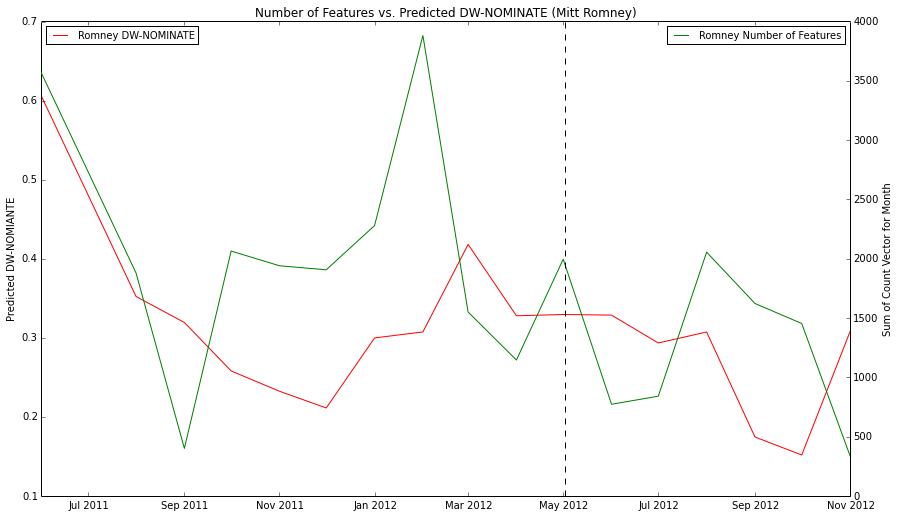

In [477]:
fig, ax1 = plt.subplots()
fig.set_size_inches(14.5, 8.5)

t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)

mittens_2 = np.asarray([l[2] for l in mittens])
ax1.plot(mittens[:,1], mittens_2, color = 'red', label="Romney DW-NOMINATE")
ax1.set_ylabel("Predicted DW-NOMIANTE")
ax1.legend(loc=2)

ax2 = ax1.twinx()
ax2.plot(romney_counts[:,0], romney_counts[:,1], color='green', label="Romney Number of Features")
ax2.set_ylabel("Sum of Count Vector for Month")
ax2.legend(loc=0)
ax2.axvline(x=datetime(2012, 5, 2, 0, 0),color='k',ls='dashed')
#ax2.text(datetime(2012, 5, 4, 0, 0),100,'Effective End \nof GOP Primary',rotation=0, fontsize=16)

plt.xticks(rotation='vertical')
plt.title("Number of Features vs. Predicted DW-NOMINATE (Mitt Romney)")
#plt.show()
plt.savefig('../../ECON_407/Primary Elections/MASTER/num_features_dwnom.eps', format='eps', dpi=1000)

In [470]:
[l[2] for l in mittens]

[0.606749343861951,
 0.352117258744601,
 0.319259450902725,
 0.257957095283297,
 0.232267010603288,
 0.211134551955296,
 0.299686055457086,
 0.307305831939291,
 0.417984078433352,
 0.327750434689692,
 0.32933792409201,
 0.328570298991478,
 0.293329536263705,
 0.307208863280522,
 0.174395150741778,
 0.151586398800535,
 0.307703016563879]